In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
import keras
%matplotlib inline

/home/shivam/.conda/envs/my_root/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df = pd.read_csv('train_E6oV3lV.csv')

In [3]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
df.groupby('label').count()

,id,tweet
label,,
0,29720,29720
1,2242,2242


In [5]:
count_class_0, count_class_1 = df['label'].value_counts()

In [6]:
df_class_0 =  df.query('label==0')
df_class_1 =  df.query('label==1')

In [7]:
df_class_0_under = df_class_0.sample(count_class_1)
df_under = pd.concat([df_class_0_under, df_class_1],ignore_index=True ,axis=0)

In [8]:
df_under.shape

(4484, 3)

In [9]:
df_under.groupby('label').count()

,id,tweet
label,,
0,2242,2242
1,2242,2242


In [10]:
X = df_under['tweet']
Y = df_under['label']
Y_org = Y

In [11]:
X[34]

'@user we are   to be sponsors   #proud @user @user sat july 2nd '

In [12]:
from keras.preprocessing.text import Tokenizer
max_features = 10000
tokenizer = Tokenizer(num_words=max_features, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', split=' ', lower=True, char_level=False, oov_token=None)
tokenizer.fit_on_texts(X.values)
X = tokenizer.texts_to_sequences(X.values)

# add padding
from keras.preprocessing.sequence import pad_sequences
X = pad_sequences(X, maxlen=400)

In [13]:
max(df['tweet'], key=len)

' @user lmfao pathetic #soit   #growup #funny #noonethere #iknowwhoitis ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98±ð\x9f\x98±ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98±ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82â\x80¦'

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit(X).transform(X)

/home/shivam/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 95)
pca.fit(X)
X = pca.transform(X);

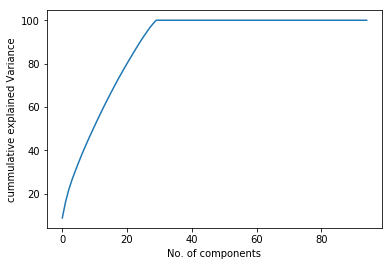

In [16]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel("No. of components")
plt.ylabel("cummulative explained Variance");

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state= 42)

In [18]:
from keras.models import Sequential 

In [19]:
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM

In [20]:
classifier = Sequential()
classifier.add(LSTM(units=40, activation='relu',return_sequences= True, input_shape=(None, 95)))
classifier.add(Dropout(rate=0.3))

In [21]:
classifier.add(LSTM(units=20, return_sequences= True,activation='relu'))
classifier.add(Dropout(rate=0.2))
classifier.add(LSTM(units=20,activation='relu'))
classifier.add(Dropout(rate=0.2))
classifier.add(Dense(units = 2, activation='sigmoid'))

In [22]:
classifier.compile(optimizer='rmsprop',metrics=['accuracy'],loss='binary_crossentropy')

In [23]:
from sklearn.preprocessing import OneHotEncoder
y_e = OneHotEncoder()
Y_train_org = Y_train
Y_test_org = Y_test
Y_train = Y_train.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)
y_e.fit(Y_train)
Y_train = y_e.transform(Y_train)
Y_test = y_e.transform(Y_test)

/home/shivam/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """
/home/shivam/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [24]:
X_train_lstm = np.reshape(X_train, (X_train.shape[0],1, X_train.shape[1]))
X_test_lstm = np.reshape(X_test, (X_test.shape[0],1 ,X_test.shape[1]))
import tensorflow as tf
with tf.device('/gpu:0'):
    checker = classifier.fit(X_train_lstm, Y_train, batch_size=32, epochs=200, validation_data = (X_test_lstm, Y_test))


Train on 3587 samples, validate on 897 samples
Epoch 1/200
3587/3587 [==============================] - 24s 7ms/step - loss: 0.6917 - acc: 0.5776 - val_loss: 0.6888 - val_acc: 0.6795
Epoch 2/200
3587/3587 [==============================] - 2s 442us/step - loss: 0.6804 - acc: 0.6560 - val_loss: 0.6782 - val_acc: 0.6789
Epoch 3/200
3587/3587 [==============================] - 2s 438us/step - loss: 0.6643 - acc: 0.6636 - val_loss: 0.6715 - val_acc: 0.6756
Epoch 4/200
3587/3587 [==============================] - 2s 436us/step - loss: 0.6520 - acc: 0.6623 - val_loss: 0.6586 - val_acc: 0.6812
Epoch 5/200
3587/3587 [==============================] - 2s 447us/step - loss: 0.6409 - acc: 0.6715 - val_loss: 0.6449 - val_acc: 0.6828
Epoch 6/200
3587/3587 [==============================] - 2s 431us/step - loss: 0.6356 - acc: 0.6769 - val_loss: 0.6386 - val_acc: 0.6834
Epoch 7/200
3587/3587 [==============================] - 2s 447us/step - loss: 0.6290 - acc: 0.6865 - val_loss: 0.6317 - val_acc: 0.

3587/3587 [==============================] - 2s 465us/step - loss: 0.5392 - acc: 0.7490 - val_loss: 0.6851 - val_acc: 0.6996
Epoch 61/200
3587/3587 [==============================] - 2s 449us/step - loss: 0.5375 - acc: 0.7529 - val_loss: 0.6733 - val_acc: 0.6951
Epoch 62/200
3587/3587 [==============================] - 2s 449us/step - loss: 0.5321 - acc: 0.7554 - val_loss: 0.6625 - val_acc: 0.6962
Epoch 63/200
3587/3587 [==============================] - 2s 445us/step - loss: 0.5372 - acc: 0.7423 - val_loss: 0.6760 - val_acc: 0.6979
Epoch 64/200
3587/3587 [==============================] - 2s 446us/step - loss: 0.5324 - acc: 0.7545 - val_loss: 0.6688 - val_acc: 0.6912
Epoch 65/200
3587/3587 [==============================] - 2s 456us/step - loss: 0.5300 - acc: 0.7485 - val_loss: 0.6790 - val_acc: 0.6973
Epoch 66/200
3587/3587 [==============================] - 2s 466us/step - loss: 0.5321 - acc: 0.7543 - val_loss: 0.6615 - val_acc: 0.7035
Epoch 67/200
3587/3587 [=======================

3587/3587 [==============================] - 2s 485us/step - loss: 0.4757 - acc: 0.7873 - val_loss: 0.6932 - val_acc: 0.7330
Epoch 120/200
3587/3587 [==============================] - 2s 424us/step - loss: 0.4699 - acc: 0.7898 - val_loss: 0.6862 - val_acc: 0.7319
Epoch 121/200
3587/3587 [==============================] - 2s 426us/step - loss: 0.4665 - acc: 0.7895 - val_loss: 0.7027 - val_acc: 0.7358
Epoch 122/200
3587/3587 [==============================] - 2s 431us/step - loss: 0.4750 - acc: 0.7817 - val_loss: 0.6907 - val_acc: 0.7358
Epoch 123/200
3587/3587 [==============================] - 2s 426us/step - loss: 0.4712 - acc: 0.7845 - val_loss: 0.7012 - val_acc: 0.7269
Epoch 124/200
3587/3587 [==============================] - 2s 424us/step - loss: 0.4785 - acc: 0.7825 - val_loss: 0.6800 - val_acc: 0.7263
Epoch 125/200
3587/3587 [==============================] - 1s 417us/step - loss: 0.4717 - acc: 0.7906 - val_loss: 0.6881 - val_acc: 0.7330
Epoch 126/200
3587/3587 [================

3587/3587 [==============================] - 2s 435us/step - loss: 0.4254 - acc: 0.8107 - val_loss: 0.7202 - val_acc: 0.7514
Epoch 179/200
3587/3587 [==============================] - 2s 427us/step - loss: 0.4333 - acc: 0.8009 - val_loss: 0.7203 - val_acc: 0.7436
Epoch 180/200
3587/3587 [==============================] - 2s 477us/step - loss: 0.4348 - acc: 0.8022 - val_loss: 0.7256 - val_acc: 0.7458
Epoch 181/200
3587/3587 [==============================] - 2s 441us/step - loss: 0.4326 - acc: 0.8050 - val_loss: 0.7435 - val_acc: 0.7436
Epoch 182/200
3587/3587 [==============================] - 2s 448us/step - loss: 0.4353 - acc: 0.8090 - val_loss: 0.7137 - val_acc: 0.7492
Epoch 183/200
3587/3587 [==============================] - 2s 450us/step - loss: 0.4397 - acc: 0.8030 - val_loss: 0.7135 - val_acc: 0.7414
Epoch 184/200
3587/3587 [==============================] - 2s 434us/step - loss: 0.4374 - acc: 0.8015 - val_loss: 0.7265 - val_acc: 0.7453
Epoch 185/200
3587/3587 [================

In [25]:
Y_pred_test_label = classifier.predict(X_test_lstm)
y_pred_test=np.argmax(Y_pred_test_label,axis =1)
y_pred_test
Y_pred_train_label = classifier.predict(X_train_lstm)
y_pred_train = np.argmax(Y_pred_train_label,axis=1)
Y_test_true = Y_test_org.astype(np.int)
Y_train_true = Y_train_org.astype(np.int)

In [26]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_true,y_pred_test))

             precision    recall  f1-score   support

          0       0.77      0.71      0.74       443
          1       0.74      0.80      0.77       454

avg / total       0.75      0.75      0.75       897



In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
### for softmax function
print("TRAIN:  \n",confusion_matrix(y_pred_train,Y_train_true))
print("\nTest:  \n",confusion_matrix(y_pred_test,Y_test_true))

TRAIN:  
 [[1373  128]
 [ 426 1660]]

Test:  
 [[315  93]
 [128 361]]


In [29]:
print(classification_report(Y_train_true,y_pred_train))

             precision    recall  f1-score   support

          0       0.91      0.76      0.83      1799
          1       0.80      0.93      0.86      1788

avg / total       0.86      0.85      0.84      3587



In [36]:
classifier.save("ann_classifier.h5")

In [37]:
from keras.models import load_model
new_model = load_model("rnn_classifier.h5")

In [38]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, None, 40)          21760     
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 40)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 20)          4880      
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 20)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dropout_3 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 42        
Total para

In [39]:
new_model.get_weights()

[array([[ 0.11310695,  0.140307  , -0.3356271 , ..., -0.16759749,
         -0.2781836 , -0.9401908 ],
        [ 0.09020896, -0.22769712, -0.06153519, ...,  0.2232761 ,
         -0.14894578,  0.55924535],
        [ 0.16288431,  0.32513678, -0.04923659, ..., -0.51932377,
          0.24815445, -0.01057171],
        ...,
        [-0.04493226,  0.12000737,  0.09115861, ...,  0.12171158,
          0.07524186,  0.14667505],
        [ 0.03513572, -0.04742594, -0.13730517, ...,  0.04065315,
          0.04260868,  0.11560479],
        [ 0.10513681, -0.07802351,  0.00621991, ...,  0.0745271 ,
         -0.06921871,  0.05683559]], dtype=float32),
 array([[-0.06442357, -0.02605159, -0.04323145, ..., -0.04987266,
          0.06833354, -0.14754143],
        [-0.05491902,  0.09304494,  0.03452028, ..., -0.03596656,
         -0.02188935, -0.08795702],
        [-0.00672218, -0.0197031 , -0.10169733, ..., -0.02838954,
         -0.02927258, -0.11133979],
        ...,
        [ 0.00604066,  0.01927673,  0.0

In [40]:
new_model.optimizer

In [41]:
new_model.predict(X_train_lstm)

array([[0.9880548 , 0.0117742 ],
       [0.34999084, 0.64975554],
       [0.25240347, 0.7473473 ],
       ...,
       [0.30437657, 0.6952641 ],
       [0.18941046, 0.81051505],
       [0.2679293 , 0.73183596]], dtype=float32)